In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft Yahei', 'SimHei', 'sans-serif']

%matplotlib inline

In [3]:
%%HTML

<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="点击按钮显示/隐藏文档代码！"></form>

数取数据

In [4]:
# 数取数据
shop = pd.read_excel('shopmall.xlsx', None)
shop

OrderedDict([('订单信息',          订单ID    客户ID  订单状态  优惠类型
              0       47739    5245     1     0
              1      341269    5245     0     0
              2       32690    5254     1     0
              3       45641    5254     1     0
              4       66116    5254     1     0
              5       79014    5254     1     0
              6       79058    5254     0     0
              7       79221    5254     1     0
              8       79608    5254     1     0
              9      146455    5254     1     0
              10     148275    5254     1     0
              11     149066    5254     1     1
              12     240219    5286     1     1
              13     287500    5286     1     0
              14     287502    5286     0     0
              15     290370    5286     0     0
              16     290372    5286     0     0
              17     378615    5286     0     0
              18     378618    5286     0     0
              19     378621    5

数据整体情况
===

订单信息：
---
* 订单ID
* 客户ID
* 订单状态
    * 1表示正常完成订单
    * 0表示未完成订单
* 优惠类型
    * 0表示无优惠
    * 1表示优惠

In [5]:
dingdan = shop['订单信息']
dingdan.head()

,订单ID,客户ID,订单状态,优惠类型
0,47739,5245,1,0
1,341269,5245,0,0
2,32690,5254,1,0
3,45641,5254,1,0
4,66116,5254,1,0


In [6]:
dingdan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29150 entries, 0 to 29149
Data columns (total 4 columns):
订单ID    29150 non-null int64
客户ID    29150 non-null int64
订单状态    29150 non-null int64
优惠类型    29150 non-null int64
dtypes: int64(4)
memory usage: 911.0 KB


货物信息：
----

* 订单ID
* 货物ID
* 货物名称
* 优惠额度
    * 分组显示优惠额度

In [7]:
huowu = shop['货物信息']
huowu.head()

,订单ID,货物ID,货物名称,优惠额度
0,264971,103247,自然乐园水果礼盒,>15
1,264994,103247,自然乐园水果礼盒,>15
2,266829,103247,自然乐园水果礼盒,>15
3,267232,103247,自然乐园水果礼盒,>15
4,269051,103247,自然乐园水果礼盒,>15


In [8]:
huowu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 4 columns):
订单ID    3130 non-null int64
货物ID    3130 non-null int64
货物名称    3130 non-null object
优惠额度    3130 non-null object
dtypes: int64(2), object(2)
memory usage: 97.9+ KB


顾客信息：
----

* 客户ID
* 登陆次数
* 注册时间(距1970-1-1的秒数)
* 本次购买时间(距1970-1-1的秒数)
* 经验值
* 订单数

In [9]:
guke = shop['顾客信息']
guke.head()

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
0,5245,55,1430413266,1495339734,206,1
1,5254,69,1430413266,1499041945,428,13
2,5286,57,1430413266,1509936376,280,1
3,5292,184,1430413266,1510135868,643,5
4,5474,71,1430413266,1481185064,61,2


In [10]:
guke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
客户ID                    3000 non-null int64
登陆次数                    3000 non-null int64
注册时间(距1970-1-1的秒数)      3000 non-null int64
本次购买时间(距1970-1-1的秒数)    3000 non-null int64
经验值                     3000 non-null int64
订单数                     3000 non-null int64
dtypes: int64(6)
memory usage: 140.7 KB


订单信息分析
-----

客户匹配
---

“无价值客户”指标量化定义
---

当客户已成交订单中，优惠商品的订单超过75%时，定义客户为无价值客户

#### 分离正常客户和无价值客户

In [11]:
dingdan.head()
# dingdan.info()
dingdan2=dingdan[dingdan['订单状态']==1]
dingdan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24137 entries, 0 to 29149
Data columns (total 4 columns):
订单ID    24137 non-null int64
客户ID    24137 non-null int64
订单状态    24137 non-null int64
优惠类型    24137 non-null int64
dtypes: int64(4)
memory usage: 942.9 KB


#### 查询所有优惠订单比例大于等于0.75的客户id

In [12]:
dd_id=dingdan2.groupby('客户ID').sum()
dd_id
# dd_id[['订单状态','优惠类型']]

wuxiao=dd_id[dd_id['优惠类型']/dd_id['订单状态']>=0.75] # 无价值客户
wuxiao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 5560 to 169976
Data columns (total 3 columns):
订单ID    1669 non-null int64
订单状态    1669 non-null int64
优惠类型    1669 non-null int64
dtypes: int64(3)
memory usage: 52.2 KB


In [22]:
# 合并表
dd_id.loc[wuxiao.index,'客户类型']=0# 新增一列，将无价值客户的值设为0
dd_id=dd_id.fillna(1)# 缺失值为正常客户，值改为1
dd_id.info()

l = pd.DataFrame(dd_id['客户类型']).astype(np.int)
guke2 = pd.merge(guke, l, left_on='客户ID', right_index=True)
guke2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 5245 to 169976
Data columns (total 4 columns):
订单ID    3000 non-null int64
订单状态    3000 non-null int64
优惠类型    3000 non-null int64
客户类型    3000 non-null float64
dtypes: float64(1), int64(3)
memory usage: 197.2 KB


,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类型
0,5245,55,1430413266,1495339734,206,1,1
1,5254,69,1430413266,1499041945,428,13,1
2,5286,57,1430413266,1509936376,280,1,1
3,5292,184,1430413266,1510135868,643,5,1
4,5474,71,1430413266,1481185064,61,2,1


In [24]:
guke2.describe()

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类型
count,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,102669.020667,157.338333,1.474146e+09,1.496260e+09,672.358667,8.624000,0.443667
std,44547.168855,406.994135,1.609252e+07,1.269127e+07,1646.677601,24.914699,0.496899
min,5245.000000,4.000000,1.430413e+09,1.469535e+09,7.000000,0.000000,0.000000
25%,67114.250000,19.000000,1.465985e+09,1.482673e+09,51.000000,1.000000,0.000000
50%,123393.000000,46.000000,1.480582e+09,1.496886e+09,146.000000,2.000000,0.000000
75%,130771.250000,131.000000,1.481637e+09,1.510270e+09,593.250000,6.000000,1.000000
max,169976.000000,11675.000000,1.510908e+09,1.511247e+09,34701.000000,534.000000,1.000000


客户特征分析
---

分析正常客户和无价值客户的特征和行为差异

#### 正常客户和无价值客户比例

In [25]:
gukeLen = guke2.groupby('客户类型').size()
gukeLen

客户类型
0    1669
1    1331
dtype: int64

In [27]:
gukeS = gukeLen / gukeLen.sum()
gukeS = gukeS.rename({0:'无价值客户', 1:'正常客户'})
gukeS

客户类型
无价值客户    0.556333
正常客户     0.443667
dtype: float64

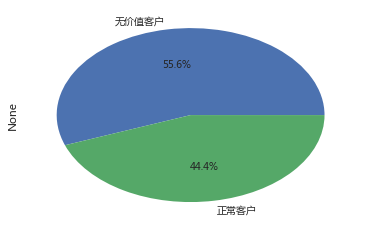

In [28]:
gukeS.plot.pie(autopct='%1.1f%%',)

根据 客户类别 分组各列，求平均值

In [29]:
gukeMean = guke2.groupby('客户类型').mean()
gukeMean

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
客户类型,,,,,,
0,121276.815458,77.547633,1.479904e+09,1.491441e+09,259.021570,2.980827
1,79335.880541,257.391435,1.466927e+09,1.502303e+09,1190.660406,15.700225


#### 年平均登陆次数差异

([<matplotlib.axis.XTick at 0xb9212b0>, <matplotlib.axis.XTick at 0xb928048>],
 <a list of 2 Text xticklabel objects>)

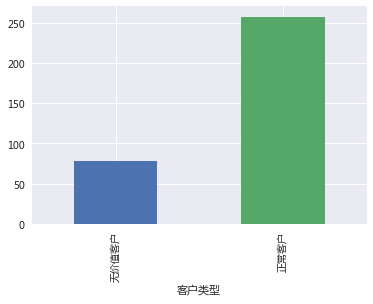

In [30]:
gukeMean['登陆次数']
gukeMean['登陆次数'].plot.bar()
plt.xticks([0,1],['无价值客户','正常客户'])

#### 用户平均经验值差异

In [32]:
gukeMean['经验值']

客户类型
0     259.021570
1    1190.660406
Name: 经验值, dtype: float64

([<matplotlib.axis.XTick at 0xbb58b70>, <matplotlib.axis.XTick at 0xbb89fd0>],
 <a list of 2 Text xticklabel objects>)

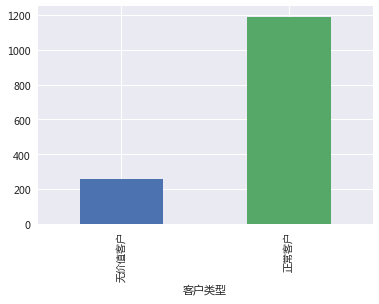

In [33]:
gukeMean['经验值'].plot.bar()
plt.xticks([0,1],['无价值客户','正常客户'])

#### 用户平均订单数差异

([<matplotlib.axis.XTick at 0xbbae978>, <matplotlib.axis.XTick at 0xbbebe10>],
 <a list of 2 Text xticklabel objects>)

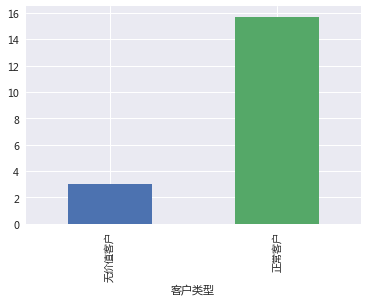

In [34]:
gukeMean['订单数']
gukeMean['订单数'].plot.bar()
plt.xticks([0,1],['无价值客户','正常客户'])

### 关于注册时间方面的分析

* 注册时间和购买时间差异
* 注册后当天购买的人

In [35]:
# 计算注册和购买间隔时间
guke2['间隔时间'] = guke2['本次购买时间(距1970-1-1的秒数)'] - guke2['注册时间(距1970-1-1的秒数)']
guke2.head()

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类型,间隔时间
0,5245,55,1430413266,1495339734,206,1,1,64926468
1,5254,69,1430413266,1499041945,428,13,1,68628679
2,5286,57,1430413266,1509936376,280,1,1,79523110
3,5292,184,1430413266,1510135868,643,5,1,79722602
4,5474,71,1430413266,1481185064,61,2,1,50771798


Text(0.5,1,'时间间隔（天）')

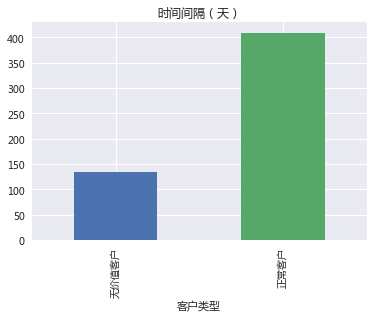

In [36]:
# 无价值客户和正常客户平均注册到购买的时间间隔（天）
a=guke2.groupby('客户类型')['间隔时间'].mean() / (24 * 3600)
a.plot.bar()
plt.xticks([0,1],['无价值客户','正常客户'])
plt.title('时间间隔（天）')

注册后当天购买的人

In [39]:
dangtian = guke2['间隔时间'] <= 24*3600
dangtian

def tihuan(x):
    return np.where(x == True, 1, 0)
dangtian2 = dangtian.apply(tihuan)

guke2['是否当天购买'] = dangtian2
guke2.head()

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类型,间隔时间,是否当天购买
0,5245,55,1430413266,1495339734,206,1,1,64926468,0
1,5254,69,1430413266,1499041945,428,13,1,68628679,0
2,5286,57,1430413266,1509936376,280,1,1,79523110,0
3,5292,184,1430413266,1510135868,643,5,1,79722602,0
4,5474,71,1430413266,1481185064,61,2,1,50771798,0


In [40]:
a=guke2.groupby('客户类型')['是否当天购买'].mean()

Text(0.5,1,'是否当天购买')

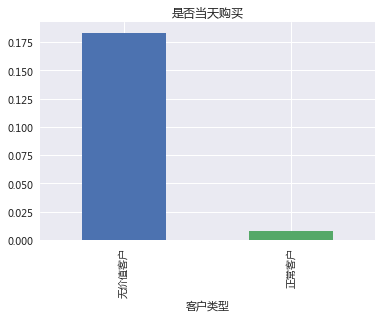

In [41]:
a.plot.bar()
plt.xticks([0,1],['无价值客户','正常客户'])
plt.title('是否当天购买')

结论：

* 无价值客户有18.3%注册后当天购物
* 正常客户有0.75%注册后当天购物

正常客户一般不在注册后当天购物

---

研究方法
---

### 订单分析


#### 分析订单的优惠额度

In [14]:
youhui = huowu.groupby('优惠额度').size()
youhui

优惠额度
0        1439
0-2       584
10-15      38
2-5       596
5-10      310
>15       163
dtype: int64

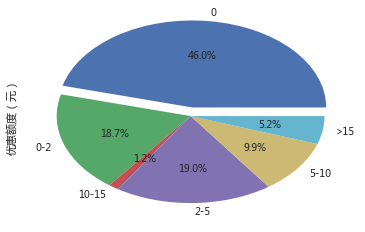

In [16]:
youhui.plot.pie(label = '优惠额度（元）',autopct='%1.1f%%',explode=(0.1,0,0,0,0,0))

### 分析订单商品排行

In [17]:
huowu.groupby('优惠额度').size()

优惠额度
0        1439
0-2       584
10-15      38
2-5       596
5-10      310
>15       163
dtype: int64

#### 原价商品销量前5排名

In [18]:
y = huowu[huowu['优惠额度'] == '0']
# y.groupby('货物名称')

a=y.groupby('货物名称').size().sort_values(ascending=False)[:5]

Text(0.5,1,'原价商品销量')

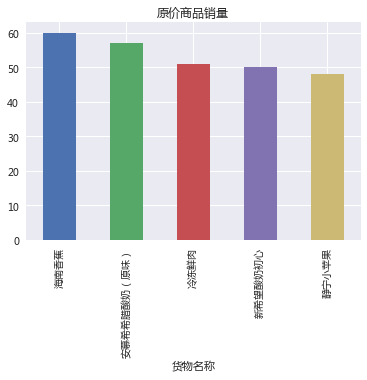

In [19]:
a.plot.bar()
plt.title('原价商品销量')

#### 优惠商品销量前10排名

In [20]:
a=huowu[-(huowu['优惠额度'] == '0')].groupby('货物名称').size().sort_values(ascending=False)[:5]
a

货物名称
蒲江耙耙柑             118
蒲江不知火丑柑【原产地直供】     61
藕                  54
青椒                 41
小葱                 39
dtype: int64

Text(0.5,1,'优惠商品销量')

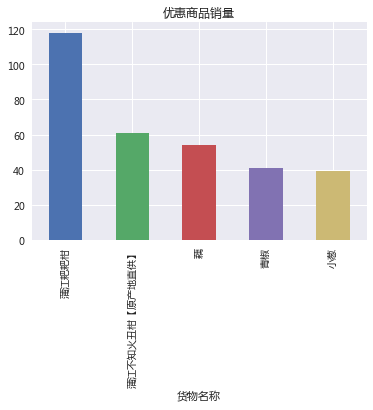

In [21]:
a.plot.bar()
plt.title('优惠商品销量')

---

研究结论
---

### 研究总结

正常客户：
* 占所有客户的44.3%
* 年平均登陆257次
* 0.75%的客户在注册当天购买
* 注册时间与本次购买时间相隔409天
* 会员经验平均值1190分
* 平均订单15单

无价值客户：
* 占所有客户的55.6%
* 年平均登陆77次
* 18.3%的客户在注册当天购买
* 注册时间与本次购买时间相隔133天
* 会员经验平均值259分
* 平均订单2单

---

### 正常客户和无价值客户的总体差异：

相对于正常客户，无价值客户：

* 登陆次数**更少**
* 会员经验**更少**
* 购买订单数**更少**
* 注册和购物时间将**更短**
* 注册后当天购买的比例**更高**

---

### 商品优惠分析

* 整体看优惠商品的优惠幅度不大，主要集中在5元以下，
* 最受欢迎的优惠商品主要是：柑橘、藕、青椒、龙眼等常见蔬菜水果

---

### 相关建议

下订单“稳准快”的无价值客户，不会在正价商品上过多停留，不会花时间去关注除优惠商品以外的其他商品。

为了节省优惠营销费用、提高盈利，给出以下建议：

* 关联推广
    * 在优惠商品处增加原价商品广告，引导客户顺便购买
* 打包销售
    * 将优惠商品与原价商品打包组合销售
* 给予推广部门激励：
    * 如果本月将无价值客户的比例从55.6%降至25%，每人奖励一万元